##  Semantic Similarities by analysing the derived embeddings with PCA

In [212]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [213]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.patheffects as PathEffects
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
from tabulate import tabulate


df_embeddings = pd.read_csv("/Users/fabianmahner/dlss-project24/output/embeddings/embeddings_CBOW_total_posts.csv")


In [214]:
df_embeddings = df_embeddings.iloc[:,1:]

In [215]:
df_embeddings

,word,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,city,3.187496e-02,-1.255769e-01,-1.252872e-01,-7.430278e-02,-6.662598e-02,-1.061271e-01,8.790804e-02,-3.463078e-02,-1.090932e-01,...,8.918405e-02,-2.928032e-03,2.923920e-02,1.201511e-01,-4.159504e-03,-1.187051e-01,-8.843514e-02,1.570602e-02,-5.467511e-02,-9.079038e-02
1,without,6.184779e-02,-1.043726e-01,-8.448507e-02,2.080021e-01,-8.813742e-02,3.024186e-02,4.034633e-02,-8.739900e-02,4.342840e-02,...,-9.296446e-02,1.871214e-02,9.012337e-02,1.016743e-01,1.136650e-02,-9.624563e-02,5.905829e-02,5.760413e-02,9.226614e-02,-1.767980e-01
2,water,-5.455660e-02,-1.529249e-01,-1.626026e-01,-5.569708e-02,1.254430e-01,4.621255e-02,1.263181e-01,-1.231628e-01,-6.419506e-02,...,2.227263e-01,-7.700393e-02,-8.255928e-02,1.432757e-01,-3.375542e-02,-1.573365e-01,-1.036720e-01,1.159502e-01,-6.682982e-02,-1.246089e-01
3,be,1.396619e+00,-1.412009e+00,-1.445828e+00,-1.298377e-01,7.235935e-02,1.158835e-01,-7.927992e-02,1.433256e-01,4.399346e-02,...,1.399278e-01,-1.651254e-01,-1.674009e+00,1.453903e+00,1.091762e+00,-1.450030e+00,-1.242432e-01,9.707630e-01,-5.642841e-02,1.538694e-01
4,our,-6.786830e-02,-5.629227e-01,-5.894241e-01,1.014113e-01,-1.364908e-02,-3.954599e-01,-5.190908e-02,-4.611208e-03,-6.772427e-01,...,2.062865e-01,-7.302897e-02,5.780031e-02,5.850066e-01,2.507563e-01,-5.819518e-01,9.253128e-02,1.647053e-01,-5.934814e-02,-2.588651e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,colab,1.104704e-24,1.522647e-04,2.045534e-05,-8.925561e-03,-4.053197e-03,1.232454e-02,1.251300e-02,1.647083e-02,-4.748537e-03,...,-4.788051e-03,1.097929e-07,-4.185686e-03,-4.315797e-05,1.036578e-02,-7.689097e-05,4.621899e-04,3.194762e-03,2.176613e-03,-8.515752e-08
9986,ladybird,-1.064568e-03,1.792277e-03,3.295426e-04,1.810920e-03,2.044498e-02,-8.877015e-03,-1.381670e-02,2.591648e-02,8.971050e-03,...,-3.143129e-02,1.614905e-02,-1.264274e-04,5.123698e-03,-3.284769e-03,5.571940e-03,-1.820427e-02,6.235522e-10,3.448384e-02,1.250696e-02
9987,populartopic,-1.182782e-02,-6.860299e-03,-1.335546e-03,1.470874e-02,-2.362208e-03,-1.408758e-04,-1.450989e-02,1.118288e-02,-3.995135e-03,...,5.837749e-03,-2.792721e-06,4.580304e-03,6.802011e-03,1.126047e-03,-6.178364e-03,-1.096115e-02,1.235175e-02,-4.304812e-03,4.572632e-03
9988,druish,-4.518600e-41,4.453500e-41,-4.609300e-41,4.655800e-41,-4.545500e-41,-4.540500e-41,4.493700e-41,1.398430e-40,-4.461000e-41,...,-4.516500e-41,4.491900e-41,-4.502200e-41,4.455700e-41,4.931400e-41,4.482900e-41,-4.479300e-41,-4.470400e-41,-4.479400e-41,-5.547500e-41


## First PCA

In [216]:
# Drop the non-numerical 'word' column
X = df_embeddings.drop(columns=['word'])
# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

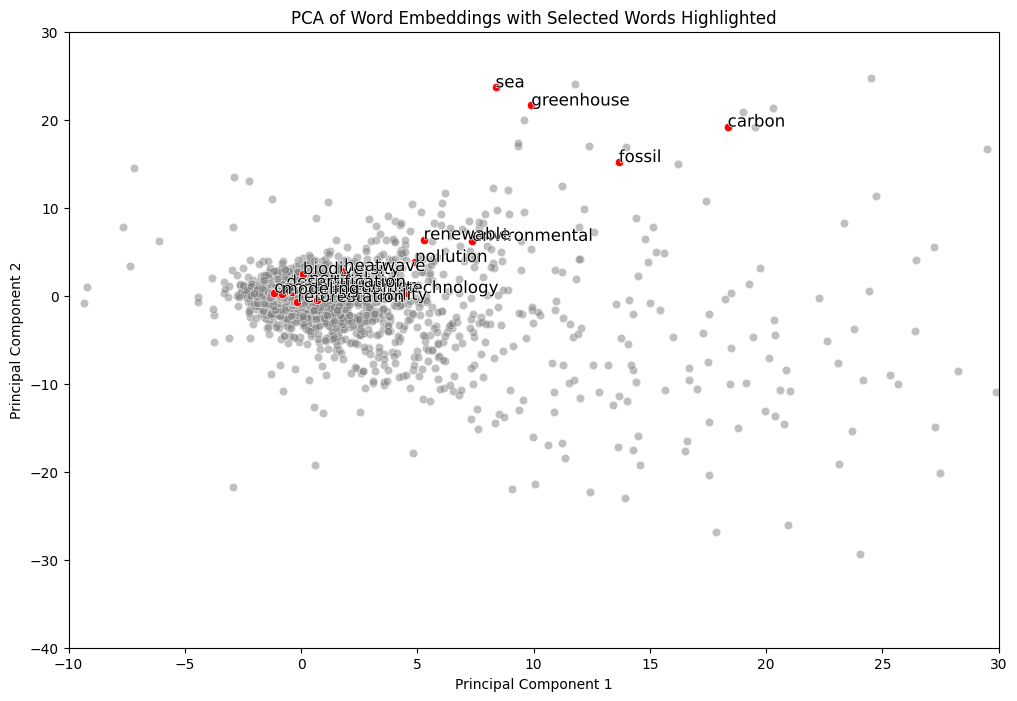

In [217]:
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'word' column back for labeling
pca_df['word'] = df_embeddings['word']

# Specifying the words to highlight

climate_change_terms = [
    "globalwarming",
    "greenhouse",
    "carbon",
    "fossil",
    "renewable",
    "deforestation",
    "sustainability",
    "ecosystem",
    "sea",
    "neutral",
    "biodiversity",
    "mitigation",
    "environmental",
    "pollution",
    "refugees",
    "reforestation",
    "technology",
    "ozone",
    "acid",
    "modeling",
    "degradation",
    "heatwave",
    "desertification"
]


# Filter the DataFrame to include only the selected words
climate_df = pca_df[pca_df['word'].isin(climate_change_terms)]

# Plotting the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color='gray', alpha=0.5)

# Highlight the selected words in a different color
sns.scatterplot(x='PC1', y='PC2', data=climate_df, color='red')


# Annotate the points with the selected word labels with improved styling
for i in range(climate_df.shape[0]):
    txt = plt.text(x=climate_df.PC1.iloc[i], y=climate_df.PC2.iloc[i], s=climate_df.word.iloc[i], 
                   fontdict=dict(color='black', size=12, weight='roman'))
    
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])

plt.xlim(-10,30)  # Example limits for PC1
plt.ylim(-40, 30)  # Example limits for PC2
plt.title('PCA of Word Embeddings with Selected Words Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [218]:
# Calculate the cosine similarity between the vectors for 'water' and 'flood'
# Extract vectors for the words
vector_water = pca_df[pca_df['word'] == 'water'][['PC1', 'PC2']].values[0]
vector_flood = pca_df[pca_df['word'] == 'flood'][['PC1', 'PC2']].values[0]
vector_heat = pca_df[pca_df['word'] == 'heat'][['PC1', 'PC2']].values[0]

# Perform the arithmetic: renewable - fossil + energy
result_vector = vector_flood - vector_water + vector_heat

# Calculate the distances between the result_vector and all other vectors
distances = np.linalg.norm(pca_df[['PC1', 'PC2']].values - result_vector, axis=1)

# Find the indices of the five closest vectors
closest_word_indices = np.argsort(distances)[:5]

# Retrieve the corresponding words
closest_words = pca_df.iloc[closest_word_indices]['word'].values

print("The five closest words to the result of the arithmetic operation are:")
for word in closest_words:
    print(word)


The five closest words to the result of the arithmetic operation are:
wildfire
deal
own
tax
city


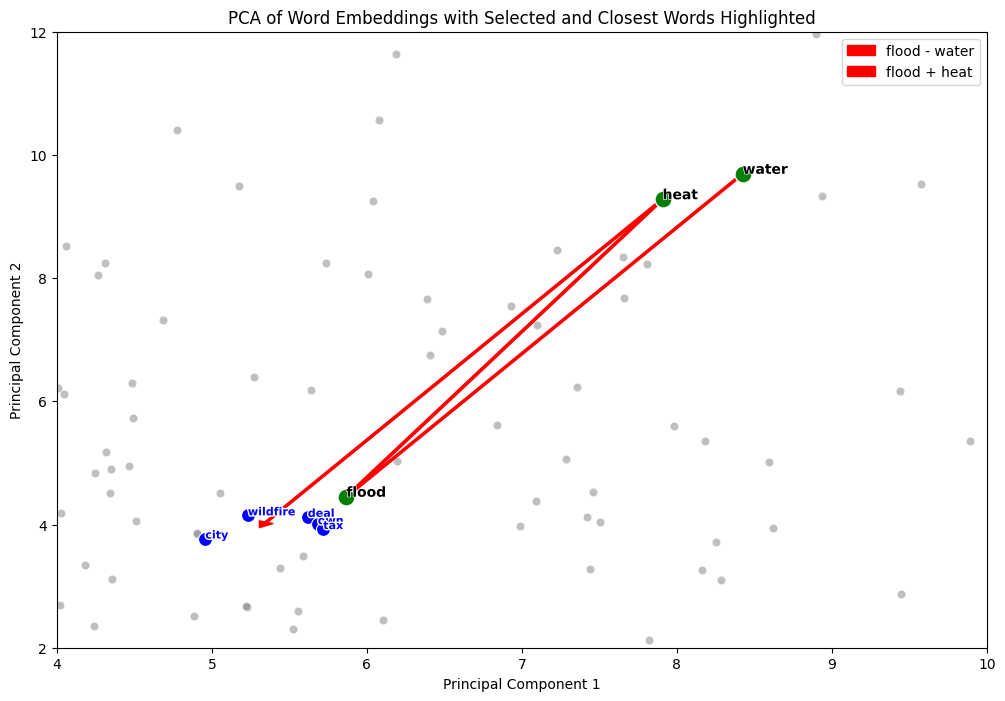

In [219]:
closest_words = pca_df.iloc[closest_word_indices].copy()

# Plotting the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color='gray', alpha=0.5)

# Highlight the closest words in blue
sns.scatterplot(x='PC1', y='PC2', data=closest_words, color='blue', marker='o', s=100)



# Draw arrows representing the vector arithmetic
plt.arrow(vector_water[0], vector_water[1], vector_flood[0] - vector_water[0], vector_flood[1] - vector_water[1], 
          color='red', width=0.02, head_width=0.1, head_length=0.1, label='flood - water')
plt.arrow(vector_flood[0], vector_flood[1], vector_heat[0] - vector_flood[0], vector_heat[1] - vector_flood[1], 
          color='red', width=0.02, head_width=0.1, head_length=0.1, label='flood + heat')
plt.arrow(vector_heat[0], vector_heat[1], result_vector[0] - vector_heat[0], result_vector[1] - vector_heat[1], 
          color='red', width=0.02, head_width=0.1, head_length=0.1)

# Annotate the resulting vector

for i in range(closest_words.shape[0]):
    plt.text(closest_words.PC1.iloc[i], closest_words.PC2.iloc[i], closest_words.word.iloc[i], 
             fontdict=dict(color='blue', size=8, weight='bold'),
             path_effects=[PathEffects.withStroke(linewidth=2, foreground='white')])
# Highlight the words involved in the arithmetic in green
arithmetic_words_df = pca_df[pca_df['word'].isin(['water', 'flood', 'heat'])]
sns.scatterplot(x='PC1', y='PC2', data=arithmetic_words_df, color='green', marker='o', s=150)
# Annotate the words involved in the arithmetic operation
for i in range(arithmetic_words_df.shape[0]):
    txt = plt.text(x=arithmetic_words_df.PC1.iloc[i], y=arithmetic_words_df.PC2.iloc[i], s=arithmetic_words_df.word.iloc[i], 
                   fontdict=dict(color='black', size=10, weight='bold'))
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])



plt.xlim(4, 10)  # Example limits for PC1
plt.ylim(2, 12)  # Example limits for PC2
plt.title('PCA of Word Embeddings with Selected and Closest Words Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Code

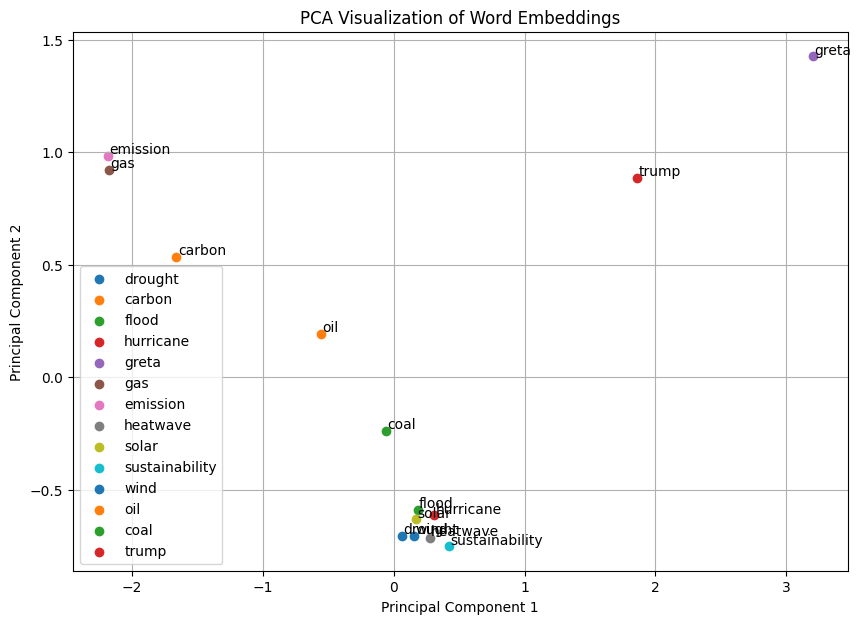

In [220]:
# List of words you want to visualize
words_to_visualize = ['carbon', 'sustainability', 'emission', "heatwave", "hurricane",
                      "drought", "flood", 
                      "trump", "greta", "wind", "solar", "coal", "oil", "gas"]

# Filter the dataframe for those words
df_filtered = df_embeddings[df_embeddings['word'].isin(words_to_visualize)]

# Extract the features for PCA
X = df_filtered.drop(columns=['word'])

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['word'] = df_filtered['word'].values

# Plot the results
plt.figure(figsize=(10, 7))
for i, word in enumerate(pca_df['word']):
    plt.scatter(pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i], label=word)
    plt.text(pca_df['PC1'].iloc[i] + 0.01, pca_df['PC2'].iloc[i] + 0.01, word, fontsize=10)

plt.title('PCA Visualization of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Cosine similarity

In [221]:
# Function to find the most similar words to a given word
def find_similar_words(word, word_embeddings, top_n=10):
    word_vector = word_embeddings.loc[word].values.reshape(1, -1)
    similarities = cosine_similarity(word_vector, word_embeddings)
    similarities = similarities.flatten()
    most_similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    similar_words = word_embeddings.index[most_similar_indices]
    return similar_words, similarities[most_similar_indices]

# Filter word embeddings to include only the relevant words
climate_terms = ["sustainability", "xi", "greta","donald",  "emission", "carbon", "climate", "greenhouse"]

similar_words_dict = {}
for term in climate_terms:
    similar_words, similarities = find_similar_words(term, df_embeddings.set_index('word'), top_n=3)
    similar_words_dict[term] = list(zip(similar_words, similarities))

# Create a DataFrame to hold the results
results = []
for term, similar_words in similar_words_dict.items():
    for word, similarity in similar_words:
        results.append([term, word, f"{similarity:.4f}"])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=['Term', 'Similar Word', 'Similarity'])

# Display the table using tabulate for better formatting
print(tabulate(df_results, headers='keys', tablefmt='pipe'))

|    | Term           | Similar Word   |   Similarity |
|---:|:---------------|:---------------|-------------:|
|  0 | sustainability | conflict       |       0.7746 |
|  1 | sustainability | education      |       0.7416 |
|  2 | sustainability | biodiversity   |       0.7322 |
|  3 | xi             | jinping        |       0.6855 |
|  4 | xi             | prince         |       0.6466 |
|  5 | xi             | attenborough   |       0.5874 |
|  6 | greta          | activist       |       0.911  |
|  7 | greta          | spar           |       0.7936 |
|  8 | greta          | thunberg       |       0.7605 |
|  9 | donald         | president      |       0.7803 |
| 10 | donald         | trump          |       0.6852 |
| 11 | donald         | barack         |       0.68   |
| 12 | emission       | gas            |       0.9381 |
| 13 | emission       | carbon         |       0.934  |
| 14 | emission       | dioxide        |       0.9101 |
| 15 | carbon         | emission       |       0

In [222]:
def cosine_similarity_between_words(word1, word2, word_embeddings):
    # Get the embeddings for the two words
    try:
        vector1 = word_embeddings.loc[word1].values.reshape(1, -1)
        vector2 = word_embeddings.loc[word2].values.reshape(1, -1)
    except KeyError as e:
        print(f"Error: {e}")
        return None
    
    # Check if the vectors are identical (which would yield a similarity of 1.0)
    if np.array_equal(vector1, vector2):
        print(f"Warning: The vectors for '{word1}' and '{word2}' are identical.")
    
    # Compute the cosine similarity
    similarity = cosine_similarity(vector1, vector2)
    
    return similarity[0][0]

# Example usage:
word1 = "emission"
word2 = "carbon"

# Assuming df_embeddings is a DataFrame with words as the index and embeddings as the columns
similarity = cosine_similarity_between_words(word1, word2, df_embeddings.set_index('word'))

print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")



Cosine similarity between 'emission' and 'carbon': 0.9339666677413528


In [223]:
# Just for exploration!

# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['word'] = df_filtered['word'].values

# Plot the results in 3D
fig = px.scatter_3d(
    pca_df, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    text='word', 
    title='3D PCA Visualization of Word Embeddings'
)

# Improve layout and appearance
fig.update_traces(marker=dict(size=8), textposition='top center')
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()